Notebook to plot and show the vibration limits for the LEMING experiment

In [1]:
import matplotlib.pyplot as plt
import numpy as np


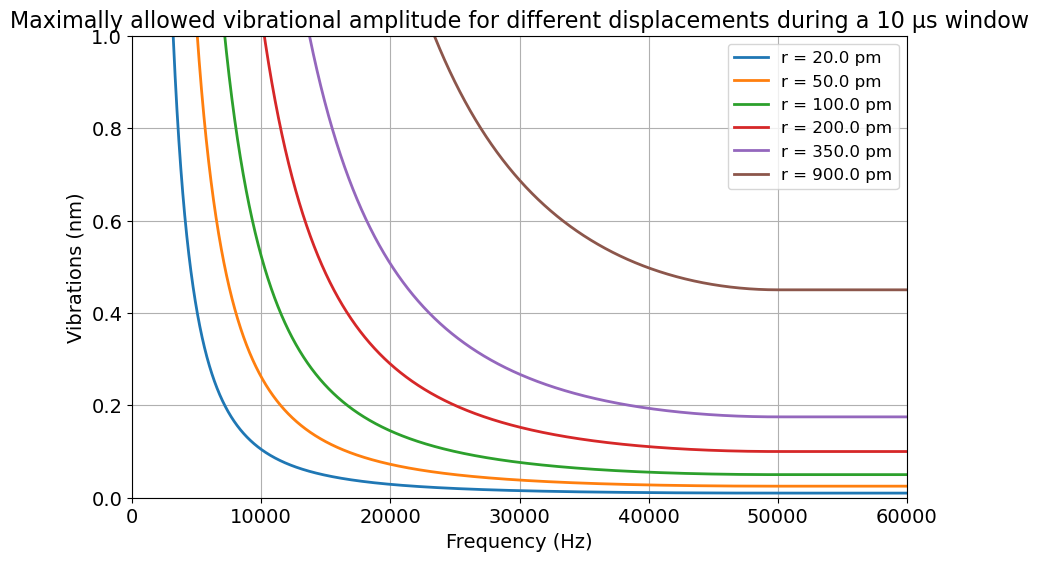

In [2]:
# Define constants
t = 10e-6  # 10 microseconds - our experimental window
f_min = 0  # start frequency (Hz)
f_max = 60000  # end frequency (Hz)
f_step = 10  # frequency step for plotting
f_threshold = 50000  # frequency after which vibrations are constant (Hz)

# Generate frequencies
frequencies = np.arange(f_min, f_max, f_step)

# Define different r values for plotting
r_values = [20e-12, 50e-12, 100e-12, 200e-12, 350e-12, 900e-12]  # 20 pm, 50 pm, 100 pm, etc

# Plotting the graph
plt.figure(figsize=(10, 6))

for r in r_values:
    # Calculate vibrations
    vibrations = np.zeros_like(frequencies, dtype=float)
    for i, f in enumerate(frequencies):
        if f > f_threshold:
            vibrations[i] = r / 2  # Set vibrations to r/2 after 50kHz
        else:
            sin_term = np.sin(np.pi * f * t)
            if sin_term != 0:
                vibrations[i] = r / (2 * sin_term**2)
            else:
                vibrations[i] = np.inf  # Handle singularity by setting it to infinity
    
    plt.plot(frequencies, vibrations * 10**9, label=f'r = {r*10**12} pm', linewidth=2)

# Setting up the plot
plt.ylim(0, 1)  # Limit y-axis for better visualization
plt.xlim(f_min, f_max)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Vibrations (nm)', fontsize=14)
plt.title('Maximally allowed vibrational amplitude for different displacements during a 10 µs window', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()
